# Coin Toss

Imagine that we toss a coin multiple times and we would like to determine the probability to toss heads. Since this kind of random experiment has only two possible outcomes, the Bernoulli distribution $\text{B}(1, p)$ is an appropriate model. The multiple coin tosses yield a sequence of indepdent random experiments. Each coin toss corresponds to a random variable $X_i$ with value $1$ for heads and value $0$ for tails ($X_i$ represents the $i$-th toss). Hence, we aim to determine $p$. The sum $\sum_i^n X_i$ describes the number of heads after $n$ trials and has a binomial distribution $\text{B}(n, p)$.

Let us assume that **we doubt the fairness of the coin!**

First, we use the frequentists approach which is strongly connected to the law of large numbers and the central limit theorem. Since we think the coin is not fair, we claim $p \ne 0.5$.  

Typically, we assume the opposite of our claim, i.e., the so-called **null hypothesis**

$$H_0: p = 0.5$$

is assumed. The strategy is to find evidence that $H_0$ is most likely wrong such that it is reasonable to reject the null hypothesis. In this way, we can accept our actual claim. This procedure is called **hypothesis testing**.

For each $n \in \mathbb{N}$, the outcome of the average $\overline{X}_n := \frac{1}{n} \sum_i^n X_i$ can be calulated. Due to the law of large numbers, we expect that this value approaches $p$ for **large** values of $n$. In any case, our estimate for $p$ will differ at least slightly from the hypothesis $p = 0.5$. From our frequentists point of view, we have to decide whether this difference is small enough to support the hypothesis. *Maybe we should reject it*? Under the assumption $p=0.5$, we can approximate the distribution of $\overline{X}_n$ by a normal distribution due to the central limit theorem and calculate a bound for the probability to observe the difference of the average to $0.5$. The larger the difference the smaller the probability. If the probability is smaller than a threshold of typically 5%, 2% or 1%, $H_0$ is rejected. The correct interpretation is that our observation is not impossible if $p=0.5$, but rather unlikely. Hence, we tend to conclude that $p \ne 0.5$. The threshold is normally called $p$**-value** (not to be confused with $p$ from our hypothesis).

So, let's do the simulation:

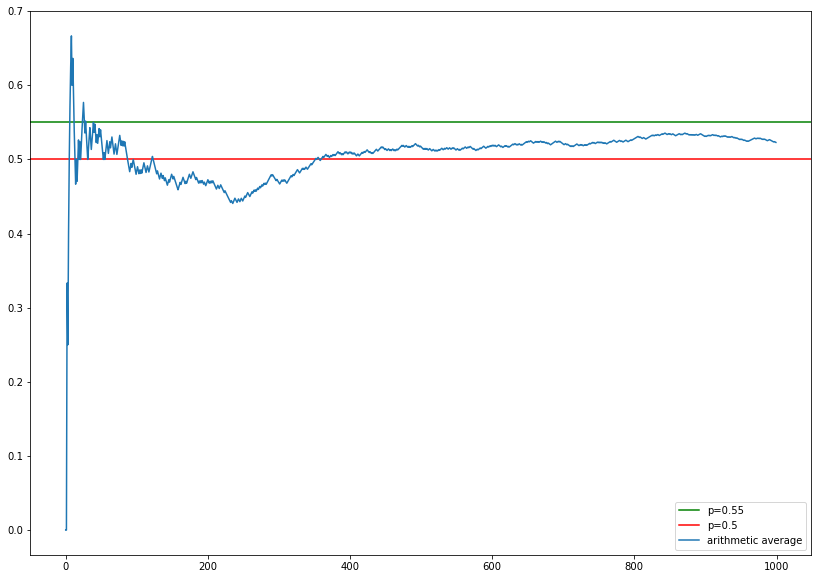

In [18]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

N = 1000 # total number of coin tosses
p = 0.55 # probability to toss heads ("unknown")
thresh = 0.05 # p-value

samples = bernoulli.rvs(p, size=N) # generate independent B(1, p)-distributed observations

average = np.zeros((N,))
for n in range(N):
    average[n] = np.sum(samples[:n])/(n + 1)

fig = plt.figure(figsize=(14, 10))
plt.axhline(y=p, color='g', linestyle='-', label='p={}'.format(p))
plt.axhline(y=0.5, color='r', linestyle='-', label='p=0.5')
plt.plot(average, label='arithmetic average')
leg = plt.legend(loc='lower right')